In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### A.데이터 전처리 - 데이터 읽어오기

In [2]:
csv_path = 'NFLX.csv'
df = pd.read_csv(csv_path, usecols=range(0,5))
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [3]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

### B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [4]:
new_df = pd.read_csv(csv_path, usecols=range(0,5))
new_df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [5]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [6]:
new_df2021 = new_df[new_df['Date'].dt.year >= 2021]
new_df2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


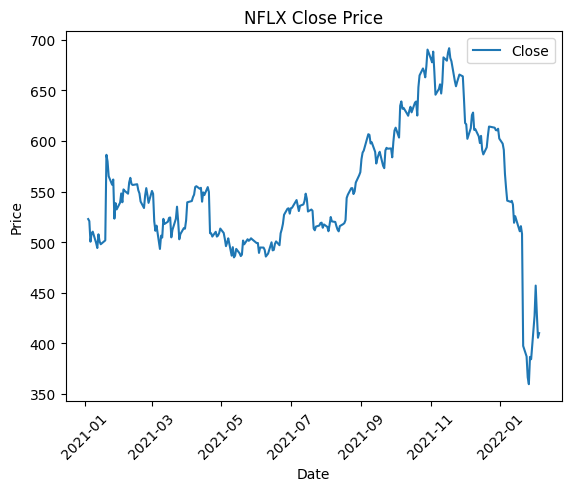

In [7]:
plt.plot(new_df2021['Date'], new_df2021['Close'], label='Close')


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)
# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

### C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [8]:
new_df2 = new_df[new_df['Date'].dt.year >= 2021]
new_df2

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [9]:
max_price = new_df2021['Close'].max()
min_price = new_df2021['Close'].min()

In [10]:
print("최고 종가:", max_price)
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

In [11]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [12]:
new_df['Date'].dt.month

0       2
1       2
2       2
3       2
4       2
       ..
1004    1
1005    2
1006    2
1007    2
1008    2
Name: Date, Length: 1009, dtype: int32

In [13]:
new_df2021['Date'] = new_df2021["Date"].dt.strftime('%Y-%m')
new_df2021

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3876\1104383630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2021['Date'] = new_df2021["Date"].dt.strftime('%Y-%m')


,Date,Open,High,Low,Close
733,2021-01,539.000000,540.799988,515.090027,522.859985
734,2021-01,521.549988,526.780029,515.890015,520.799988
735,2021-01,511.970001,513.099976,499.500000,500.489990
736,2021-01,508.279999,516.440002,506.420013,508.890015
737,2021-01,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01,401.970001,427.700012,398.200012,427.140015
1005,2022-02,432.959991,458.480011,425.540009,457.130005
1006,2022-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02,421.440002,429.260010,404.279999,405.600006


In [14]:
new_df2021['Year'] = new_df['Date'].dt.year
new_df2021['Month'] = new_df['Date'].dt.month
new_df2021
#a = new_df2021.groupby(new_df2021['Year', 'Month']).mean()
#a = new_df2021.groupby(new_df2021['Month'])['Close'].mean()
#b = new_df2021.groupby(new_df2021['Year'])['Close'].mean()

#new_df2021.groupby(['Month', 'Year']).mean()

#new_df = new_df.groupby(['Year', 'Month']).mean()
# new_df2021


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3876\2844049343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2021['Year'] = new_df['Date'].dt.year
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_3876\2844049343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2021['Month'] = new_df['Date'].dt.month


,Date,Open,High,Low,Close,Year,Month
733,2021-01,539.000000,540.799988,515.090027,522.859985,2021,1
734,2021-01,521.549988,526.780029,515.890015,520.799988,2021,1
735,2021-01,511.970001,513.099976,499.500000,500.489990,2021,1
736,2021-01,508.279999,516.440002,506.420013,508.890015,2021,1
737,2021-01,511.309998,513.239990,504.510010,510.399994,2021,1
...,...,...,...,...,...,...,...
1004,2022-01,401.970001,427.700012,398.200012,427.140015,2022,1
1005,2022-02,432.959991,458.480011,425.540009,457.130005,2022,2
1006,2022-02,448.250000,451.980011,426.480011,429.480011,2022,2
1007,2022-02,421.440002,429.260010,404.279999,405.600006,2022,2


In [15]:
c = new_df2021.groupby(['Date']).mean().reset_index()
c


,Date,Open,High,Low,Close,Year,Month
0,2021-01,530.531051,537.838944,519.854214,526.816845,2021.0,1.0
1,2021-02,547.777366,555.494205,540.621576,548.959999,2021.0,2.0
2,2021-03,519.429134,527.057390,511.326090,518.123482,2021.0,3.0
3,2021-04,532.810952,537.802858,527.041430,533.136662,2021.0,4.0
4,2021-05,496.923996,502.062502,491.996503,496.714497,2021.0,5.0
5,2021-06,503.470914,508.116364,498.675455,503.324091,2021.0,6.0
6,2021-07,528.609045,534.298567,522.618091,528.653330,2021.0,7.0
7,2021-08,529.884541,535.937267,526.222275,532.346817,2021.0,8.0
8,2021-09,589.405233,598.170003,583.384760,590.795239,2021.0,9.0
9,2021-10,639.220474,648.829043,632.430001,642.202849,2021.0,10.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2021-01'),
  Text(1, 0, '2021-02'),
  Text(2, 0, '2021-03'),
  Text(3, 0, '2021-04'),
  Text(4, 0, '2021-05'),
  Text(5, 0, '2021-06'),
  Text(6, 0, '2021-07'),
  Text(7, 0, '2021-08'),
  Text(8, 0, '2021-09'),
  Text(9, 0, '2021-10'),
  Text(10, 0, '2021-11'),
  Text(11, 0, '2021-12'),
  Text(12, 0, '2022-01'),
  Text(13, 0, '2022-02')])

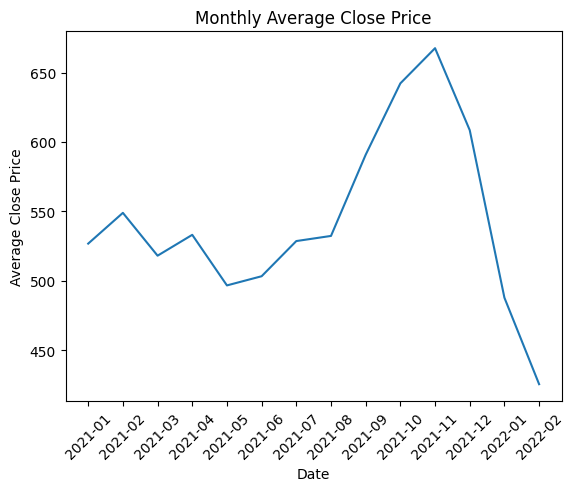

In [16]:
plt.plot(c['Date'],c['Close'], label ='Close')
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
#plt.legend()
plt.xticks(rotation=45)

### E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

In [18]:
new_df2 = new_df[new_df['Date'].dt.year >= 2022]
new_df2

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


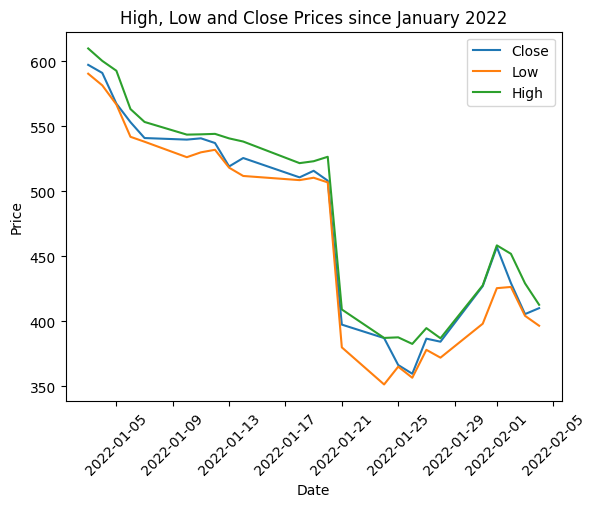

In [19]:
plt.plot(new_df2['Date'], new_df2['Close'], label='Close')
plt.plot(new_df2['Date'], new_df2['Low'], label='Low')
plt.plot(new_df2['Date'], new_df2['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low and Close Prices since January 2022')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()
#plt.xticks(rotation=45)